# Polynomial Regression for Harry Potter fanfiction
(including web scrapping and data preprocessing)

import libraries

In [196]:
from bs4 import BeautifulSoup
import numpy as np
from sklearn.linear_model import LinearRegression
import requests
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

create a list of dates

In [197]:
fanfics_date = []

In [199]:
for i in range(1,1000):
  url = f'https//find_the_website_by_yourself/&page={i}'
  response = requests.get(url)
  response = response.content
  soup = BeautifulSoup(response, 'html.parser')
  date = soup.find('p', class_='datetime')
  if date is not None:
    fanfics_date.append(date.text)

In [200]:
print(fanfics_date)

['04 Nov 2023', '04 Nov 2023', '04 Nov 2023', '04 Nov 2023', '04 Nov 2023', '04 Nov 2023', '03 Nov 2023', '03 Nov 2023', '03 Nov 2023', '03 Nov 2023', '02 Nov 2023', '01 Nov 2023', '01 Nov 2023', '01 Nov 2023', '31 Oct 2023', '31 Oct 2023', '31 Oct 2023', '30 Oct 2023', '30 Oct 2023', '30 Oct 2023', '29 Oct 2023', '29 Oct 2023', '28 Oct 2023', '28 Oct 2023', '28 Oct 2023', '27 Oct 2023', '27 Oct 2023', '26 Oct 2023', '26 Oct 2023', '25 Oct 2023', '24 Oct 2023', '23 Oct 2023', '23 Oct 2023', '22 Oct 2023', '22 Oct 2023', '21 Oct 2023', '21 Oct 2023', '20 Oct 2023', '20 Oct 2023', '19 Oct 2023', '19 Oct 2023', '18 Oct 2023', '18 Oct 2023', '17 Oct 2023', '17 Oct 2023', '16 Oct 2023', '15 Oct 2023']


make it dateframe

In [202]:
db = pd.DataFrame(fanfics_date, columns=['Date'])

In [203]:
print(db)

           Date
0   04 Nov 2023
1   04 Nov 2023
2   04 Nov 2023
3   04 Nov 2023
4   04 Nov 2023
5   04 Nov 2023
6   03 Nov 2023
7   03 Nov 2023
8   03 Nov 2023
9   03 Nov 2023
10  02 Nov 2023
11  01 Nov 2023
12  01 Nov 2023
13  01 Nov 2023
14  31 Oct 2023
15  31 Oct 2023
16  31 Oct 2023
17  30 Oct 2023
18  30 Oct 2023
19  30 Oct 2023
20  29 Oct 2023
21  29 Oct 2023
22  28 Oct 2023
23  28 Oct 2023
24  28 Oct 2023
25  27 Oct 2023
26  27 Oct 2023
27  26 Oct 2023
28  26 Oct 2023
29  25 Oct 2023
30  24 Oct 2023
31  23 Oct 2023
32  23 Oct 2023
33  22 Oct 2023
34  22 Oct 2023
35  21 Oct 2023
36  21 Oct 2023
37  20 Oct 2023
38  20 Oct 2023
39  19 Oct 2023
40  19 Oct 2023
41  18 Oct 2023
42  18 Oct 2023
43  17 Oct 2023
44  17 Oct 2023
45  16 Oct 2023
46  15 Oct 2023


a bit of reformatting for date

In [204]:
db["Date"] = pd.to_datetime(db.Date, format="%d %b %Y")

In [205]:
import datetime as dt
today = pd.datetime.today()
db['days_since'] = (today - db.Date ).astype('timedelta64[D]')

<ipython-input-205-0728c2b2e1a1>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = pd.datetime.today()


In [206]:
db

,Date,days_since
0,2023-11-04,0.0
1,2023-11-04,0.0
2,2023-11-04,0.0
3,2023-11-04,0.0
4,2023-11-04,0.0
5,2023-11-04,0.0
6,2023-11-03,1.0
7,2023-11-03,1.0
8,2023-11-03,1.0
9,2023-11-03,1.0


grouping by date

In [207]:
df=db.groupby(['days_since'])['days_since'].count()

In [208]:
df

days_since
0.0     6
1.0     4
2.0     1
3.0     3
4.0     3
5.0     3
6.0     2
7.0     3
8.0     2
9.0     2
10.0    1
11.0    1
12.0    2
13.0    2
14.0    2
15.0    2
16.0    2
17.0    2
18.0    2
19.0    1
20.0    1
Name: days_since, dtype: int64

In [209]:
X = np.array(df.index)
y = np.array(df[:])

In [210]:
print(X)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


In [211]:
print(y)

[6 4 1 3 3 3 2 3 2 2 1 1 2 2 2 2 2 2 2 1 1]


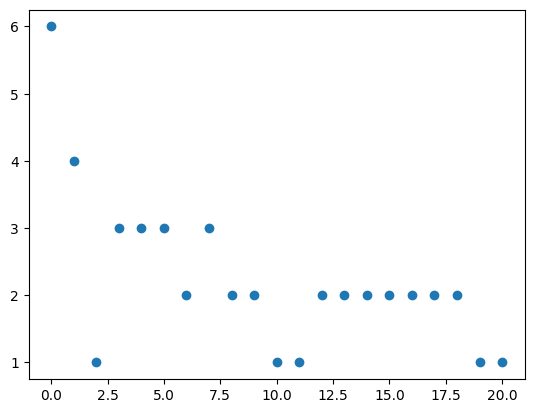

In [212]:
plt.scatter(X,y)

**Polynomial Regression and Data Preprocessing**

In [218]:
poly=PolynomialFeatures(degree=2,include_bias=True)
poly_features=poly.fit_transform(X.reshape(-1,1))

In [219]:
# create model
poly_reg_model=LinearRegression()
# train model
poly_reg_model.fit(poly_features,y)

LinearRegression()

In [220]:
# start_predicting
y_predict=poly_reg_model.predict(poly_features)
print(f"original data{y} predicted data {y_predict}")

original data[6 4 1 3 3 3 2 3 2 2 1 1 2 2 2 2 2 2 2 1 1] predicted data [4.13043478 3.79909656 3.49019585 3.20373265 2.93970697 2.69811881
 2.47896817 2.28225504 2.10797943 1.95614134 1.82674076 1.71977771
 1.63525216 1.57316414 1.53351363 1.51630063 1.52152516 1.5491872
 1.59928675 1.67182383 1.76679842]


visualization

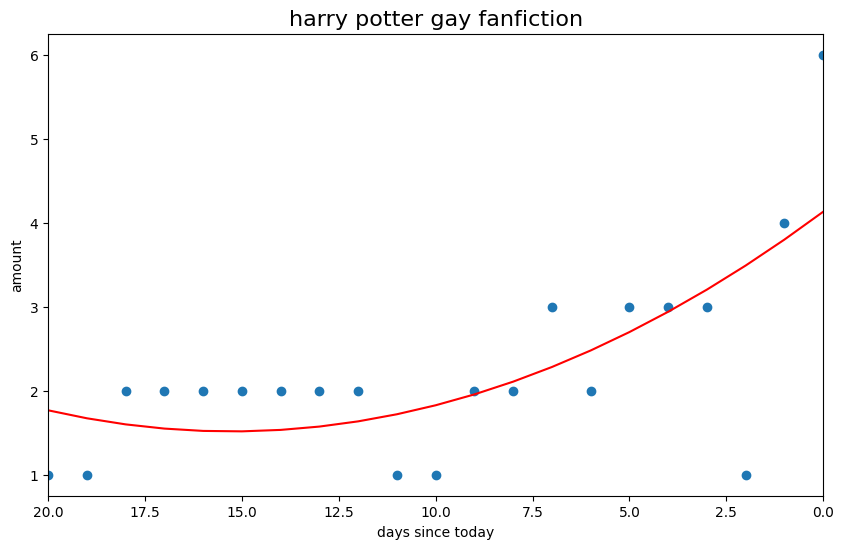

In [226]:
# plot model
plt.figure(figsize=(10,6))
plt.title("harry potter gay fanfiction",size=16)
plt.xlim(max(X), min(X))
plt.xlabel("days since today")
plt.ylabel("amount")
plt.scatter(X,y)
plt.plot(X,y_predict,c="red")
plt.show()

## Some playing around

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaler = scaler.transform(X_test.reshape(-1, 1))

In [231]:
lin = LinearRegression()

In [232]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_poly_train, y_train)
lin.fit(X_poly_train, y_train)

LinearRegression()

In [233]:
y_pred = lin.predict(X_test_poly)

In [234]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.43682741275386916

In [235]:
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

0.40251297730740354

In [236]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_poly_train, y_train)
lin = LinearRegression()
lin.fit(X_poly_train, y_train)

LinearRegression()

In [237]:
y_pred = lin.predict(X_test_poly)
mean_absolute_error(y_test, y_pred)

0.29502977966410193

In [238]:
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

0.5073490693297659

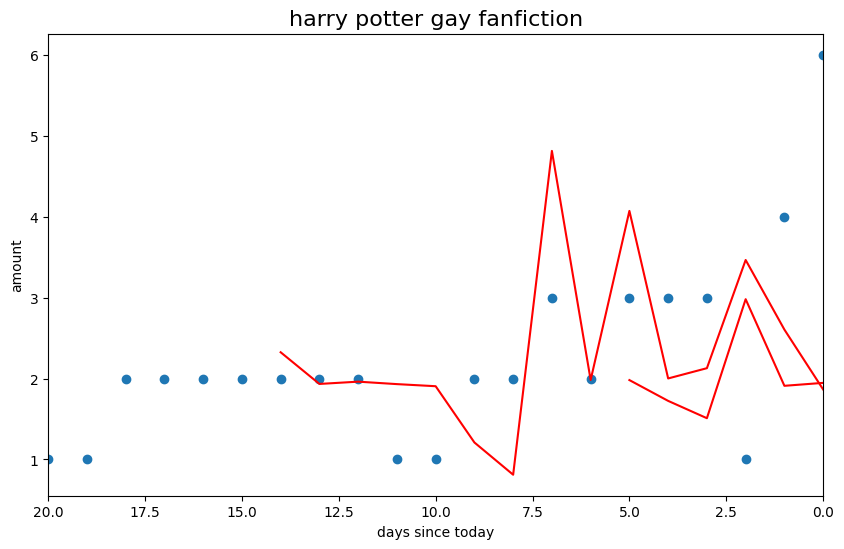

In [259]:
# plot model
plt.figure(figsize=(10,6))
plt.title("harry potter gay fanfiction",size=16)
plt.xlim(max(X), min(X))
plt.xlabel("days since today")
plt.ylabel("amount")
plt.scatter(X,y)
plt.plot(y_pred,c="red")
plt.plot(y_pred_train,c="red")
plt.show()